In [149]:
# ------------------------- #
# Importación de librerías  #
# ------------------------- #

# Librerías estándar para análisis de datos y cálculos matemáticos
import numpy as np
import pandas as pd
import math
import random

# Librerías para bases de datos
import pyodbc
import sqlite3

# Visualización
import seaborn as sns

# Machine Learning y modelado
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans

# Estadísticas y pruebas de hipótesis
from scipy.stats import (
    rv_discrete, t, binom, chi2, f, 
    ttest_ind
)
from sklearn.utils import resample

# ------------------------- #
# Importación de módulos    #
# ------------------------- #

# Modulo EDA
import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

# Módulo de funciones personalizadas
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

# Módulo de distribución
import funciones_distribucion
importlib.reload(funciones_distribucion)
from funciones_distribucion import *

# Módulo de pruebas significativas
import funciones_pruebas_significativas
importlib.reload(funciones_pruebas_significativas)
from funciones_pruebas_significativas import *

# Módulo de clostering
import funciones_clostering
importlib.reload(funciones_clostering)
from funciones_clostering import *


In [150]:
url = 'df_closter_cliente.csv'
df = pd.read_csv(url, index_col=None)
#df.drop('index', axis=1, inplace=True)

In [151]:
df.head(3)

,ORDER_DATE,SALES_ORDER_ID,CUSTOMER_ID,cliente,PRODUCT_ID,QTY,Semana
0,2024-04-29,7193734772,29463,2,288,1.0,18
1,2024-04-29,7193734772,29463,2,124,1.0,18
2,2024-04-29,7193734772,29463,2,601,1.0,18


In [152]:
df['PRODUCT_ID'].nunique()

51

se realiza análisis desagregados para "Minimercado Independ" para identificar patrones únicos y explorar su potencial de crecimiento.

### Agrupar K-means para clientes

In [153]:
producto=agrupar_closter_producto(df)
producto.head(3)

,SALES_ORDER_ID,QTY,CUSTOMER_ID
PRODUCT_ID,,,
91,2059,6978.0,1180
87,1973,3480.0,1217
26,1248,1382.0,917


El conjunto de datos filtrado para las categorías "Minimercado Independ"  contiene 51 productos. por lo que se va a implementar un modelo no supervisado de clostering como 
K-means que  permite reducir esta complejidad agrupando prodcutos con comportamientos similares en un número manejable de clústeres.
Una vez segmentados los productos, se puede usar la asignación de clústeres como una nueva característica de productos y remplazar la variable original de productos por el closter.

las caracteriticas con las que se agrupo los clientes fueron:
Frecuencia de compra, 
Monto total pedido producto,
Tipos de productos. 


### metodo del codo 

se implementa la tecnica del codo para determinar el número óptimo de clústeres, en el algoritmo K-means. Evalúa cómo la inercia (suma de las distancias al cuadrado entre cada punto y su centroide asignado) disminuye a medida que se incrementa el número de clústeres.

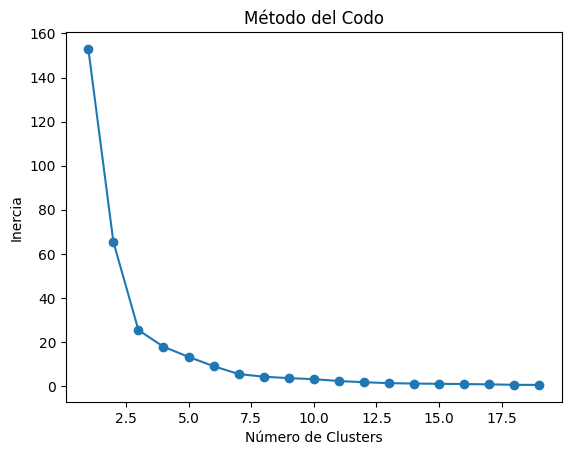

In [154]:
metodo_codo_productos(producto,20)

En el gráfico se observa una disminución rápida de la inercia al aumentar el número de clústeres, La inercia disminuye rápidamente al inicio (de 1 a 4 grupos aproximadamente) y luego la pendiente comienza a estabilizarse.

El "codo" es donde la tasa de disminución de la inercia se desacelera notablemente. En este gráfico, el codo parece estar alrededor de 3 o 4 grupos  de producto.

### modelo de closter de productos

In [155]:
modelo_clostering=modelo_kmeans_productos(producto,7)

In [156]:
df.reset_index(inplace=True)
modelo_clostering.reset_index(inplace=True)
df_combinado = pd.merge(df, modelo_clostering[['PRODUCT_ID', 'Cluster_producto']], on='PRODUCT_ID', how='left')

In [157]:
df_combinado = df_combinado.drop(['index'], axis=1)

In [158]:
resumen_inicial(df[['ORDER_DATE','CUSTOMER_ID','cliente','PRODUCT_ID'\
    ,'QTY','Semana']])

,columns,tipo de dato,categorias
0,ORDER_DATE,object,52
1,CUSTOMER_ID,int64,1775
2,cliente,int64,5
3,PRODUCT_ID,int64,51
4,QTY,float64,19
5,Semana,int64,9


In [159]:
resumen_inicial(df_combinado)

,columns,tipo de dato,categorias
0,ORDER_DATE,object,52
1,SALES_ORDER_ID,int64,5317
2,CUSTOMER_ID,int64,1775
3,cliente,int64,5
4,PRODUCT_ID,int64,51
5,QTY,float64,19
6,Semana,int64,9
7,Cluster_producto,int32,7


se paso de 51 productos individuales a 4 clusters , representando grupos con características similares. Esto simplifica significativamente el modelo y permite generalizar patrones en lugar de trabajar de forma individual.


In [160]:
df_combinado.rename(columns={'Cluster_producto': 'producto'}, inplace=True)

In [161]:
df_combinado=df_combinado[['ORDER_DATE','Semana','CUSTOMER_ID','cliente'\
    
    ,'PRODUCT_ID','producto','QTY']]

In [162]:
df_combinado.to_csv('df_modelo.csv', index=False)

In [163]:
df_combinado[df_combinado.cliente==1].nunique()

ORDER_DATE      41
Semana           9
CUSTOMER_ID    614
cliente          1
PRODUCT_ID      43
producto         7
QTY             15
dtype: int64